MainProcess


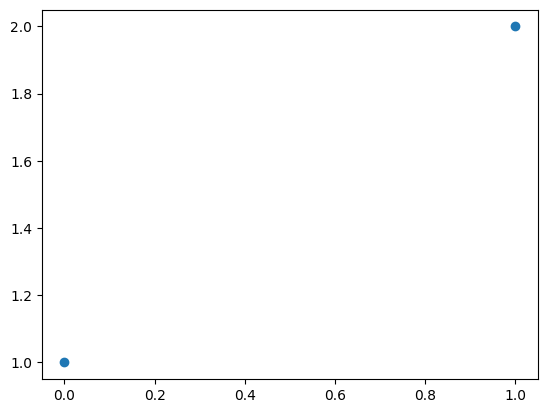

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
#Prepare datasets
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 201
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.close_mosaic = 100
model.step1Labels.cos_lr = True
model.step1Labels.lrf = 0.0
model.step1Labels.patience = 0
#model.step1Labels.mixup = 0.0

In [5]:
# model.train(loaded_data.train_data, loaded_data.test_data)
# fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
# import shutil
# shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
# fls.dill_save(fls.temp_dir + '/intermediate_weights/model.pickle', model)

In [18]:
# import ultralytics
# import time
test_data = loaded_data.test_data
# data_list = []
# times = []
epoch_list = np.arange(0,201,20)
# for epoch in epoch_list:
#     t=time.time()
#     model = fls.dill_load(fls.temp_dir + '/intermediate_weights - Copy/model.pickle')
#     model.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights - Copyepoch' + str(epoch) + '.pt')]
#     model.step1Labels.concentration = 2
#     model.run_in_parallel=True
#     data_list.append(model.infer(test_data))
#     times.append(time.time()-t)
#     fls.dill_save(fls.temp_dir + '/intermediate_weights - Copy/' + str(epoch) + '.pickle', data_list)
# fls.dill_save(fls.temp_dir + 'intermediate_data - Copy.pickle', data_list)

In [19]:
#times

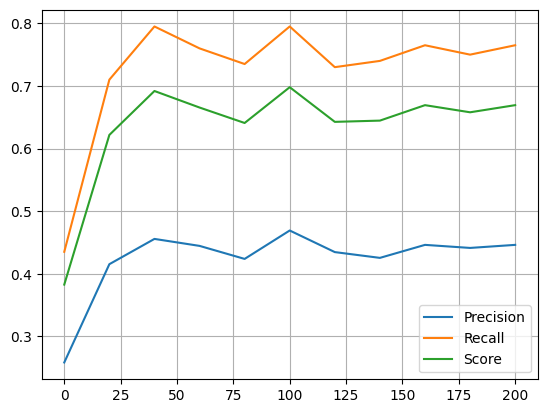

In [20]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data - Copy.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores = []
for d in data_list:
    a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
    scores.append(fls.score_competition_metric(a,b))
plt.plot(epoch_list,scores)
plt.grid(True)
plt.legend(['Precision', 'Recall', 'Score'])

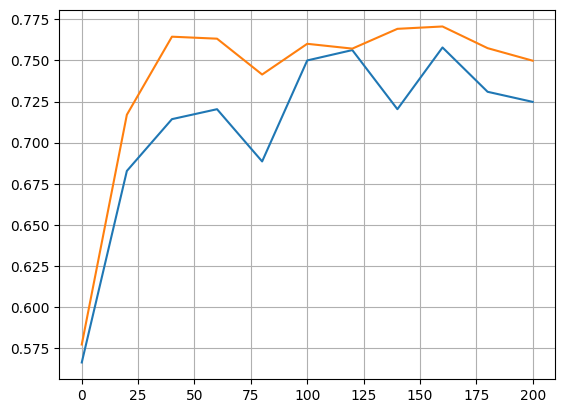

In [26]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data - Copy.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores1 = []
scores2 = []
for d in data_list:
    inds = np.arange(len(test_data))
    np.random.default_rng(seed=0).shuffle(inds)   
    mid = len(inds)//2
    d2 = []
    test_data2 = []
    for ii in inds:
        d2.append(d[ii])
        test_data2.append(test_data[ii])
    a,b = flg_diagnostics.expand_and_reinfer(d2, test_data2, model.step3Output.select_motors, 0.7)
    scores1.append(fls.score_competition_metric(a[:mid],b[:mid])[2])
    scores2.append(fls.score_competition_metric(a[mid:],b[mid:])[2])
plt.plot(epoch_list,scores1)
plt.plot(epoch_list,scores2)
plt.grid(True)

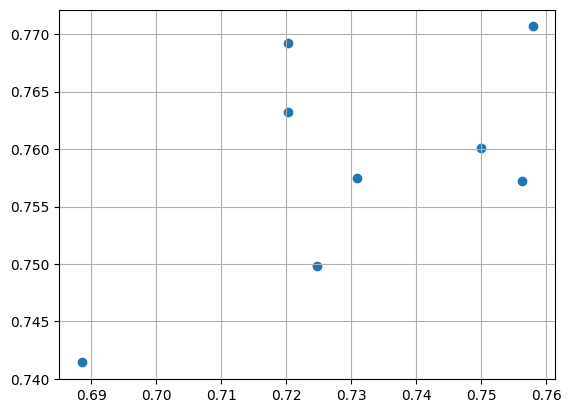

In [25]:
plt.figure()
plt.scatter(scores1[3:],scores2[3:])
plt.grid(True)

yolov8m with extra data

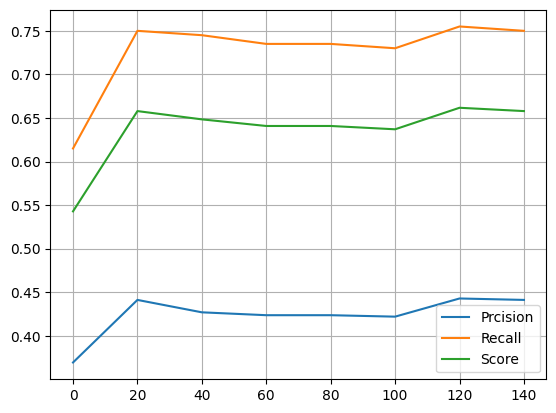

yolov8m no extra data

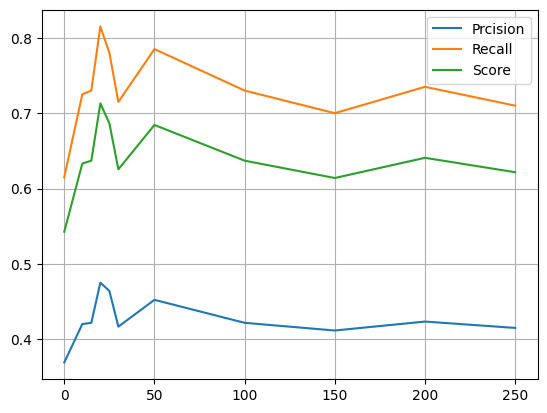

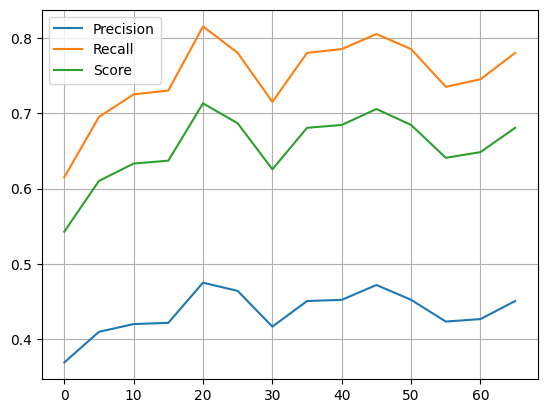

yolov8m no extra data no mosaic

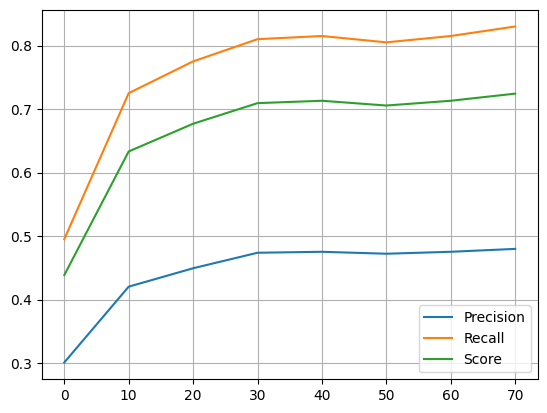

yolov8m no extra data no mosaic no cos_lr

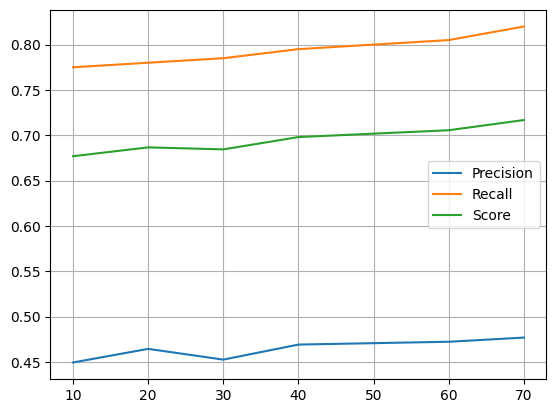

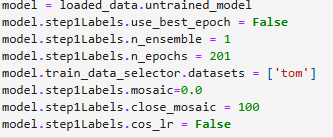

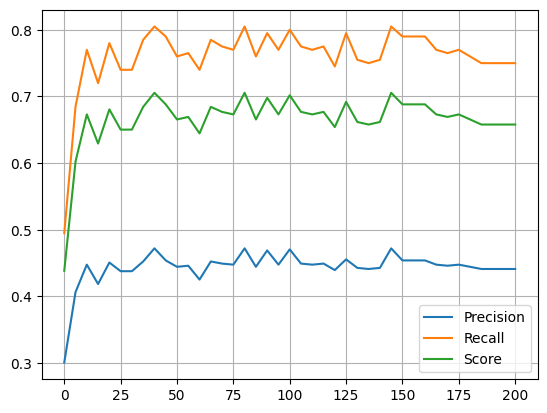

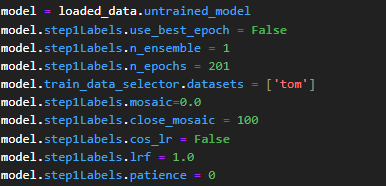

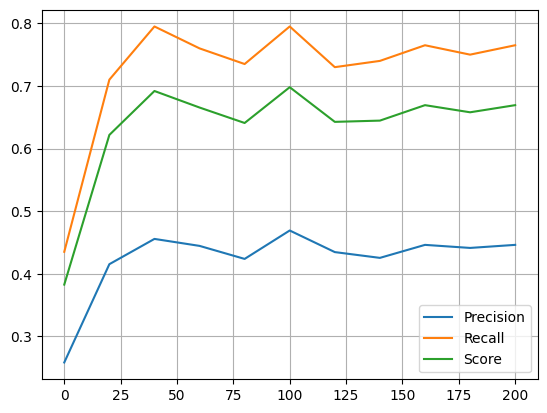

In [ ]:
import subprocess
def do_upload(library_name, local_dir):
    if fls.env=='vast':
        subprocess.run('rm -rf /kaggle_temp', shell=True)
        subprocess.run('mkdir /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets metadata -p /kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cp '+local_dir+' /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets version -p /kaggle_temp/ -m '+'x', shell=True)
    else:
        subprocess.run('cd d:/ && rd /s /q kaggle_temp', shell=True)
        subprocess.run('cd d:/ && d: && mkdir kaggle_temp', shell=True)
        subprocess.run('kaggle datasets metadata -p d:/kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cd d:/kaggle_temp/ && d: && copy '+local_dir+' d:', shell=True)
        subprocess.run('kaggle datasets version -p d:\\kaggle_temp\\ -m '+'x', shell=True)

In [ ]:
#do_upload('jeroencottaar/my-flg-models', fls.temp_dir + '/intermediate_weights/*.*')

In [ ]:
model.step1Labels.trained_model[0]